
Perceptron Accuracy: 25.00%


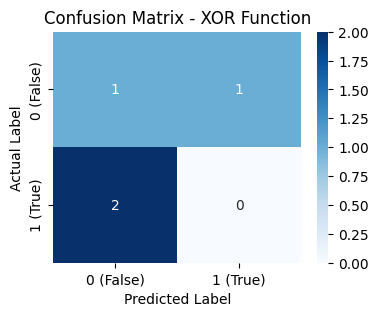

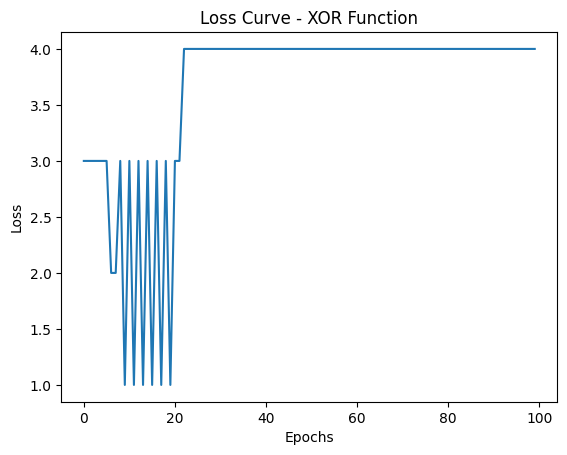

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Perceptron Model Implementation
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.randn(input_size + 1)  # Initialize weights randomly (including bias)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.loss_history = []  # Track loss over training epochs

    def activation(self, x):
        return 1 if x >= 0 else 0  # Step activation function

    def predict(self, x):
        x = np.insert(x, 0, 1)  # Insert bias term at the beginning
        return self.activation(np.dot(self.weights, x))

    def train(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias column
        for epoch in range(self.epochs):
            total_loss = 0  # Cumulative loss per epoch
            for i in range(X.shape[0]):
                y_pred = self.activation(np.dot(self.weights, X[i]))
                error = y[i] - y_pred
                self.weights += self.learning_rate * error * X[i]  # Adjust weights
                total_loss += abs(error)
            self.loss_history.append(total_loss)

    def evaluate(self, X, y):
        y_pred = [self.predict(x) for x in X]
        accuracy = sum(1 for i in range(len(y)) if y_pred[i] == y[i]) / len(y)
        return accuracy, y_pred

    def compute_confusion_matrix(self, X, y):
        y_pred = [self.predict(x) for x in X]
        return confusion_matrix(y, y_pred)

# Function to visualize confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (False)", "1 (True)"], yticklabels=["0 (False)", "1 (True)"])
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

# Function to plot training loss over epochs
def plot_loss_curve(loss_history, title):
    plt.plot(loss_history)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Loss Curve - {title}")
    plt.show()

# Define a different input dataset (XOR function)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR function output

# Initialize and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(X, y)
accuracy, predictions = perceptron.evaluate(X, y)
cm = perceptron.compute_confusion_matrix(X, y)

# Display results
print(f"\nPerceptron Accuracy: {accuracy * 100:.2f}%")
plot_confusion_matrix(cm, "XOR Function")
plot_loss_curve(perceptron.loss_history, "XOR Function")

# Summary:
# - Created a perceptron model to classify binary inputs.
# - Trained and evaluated the model on the XOR function.
# - Visualized performance using accuracy, confusion matrix, and loss curve.
